In [1]:
import numpy as np
import Structures as S
import common as C
import SpinSystemAssigner as ssa
import networkx as nx
import scipy.stats as sps

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
name = 'TM1112'
p = S.TrueProtein(C.SPIN_SYSTEM_TESTS[name]['protein'],
                  ppm_file=C.SPIN_SYSTEM_TESTS[name]['ppm'])
# p = S.TrueProtein(C.TESTS['bmr4752'])
# e = S.SimulatedExperiment(p, ['HSQC', 'HNCACB', 'HN(CO)CACB'])
e = S.SpinSystemExperiment(p, ['HSQC', 'HNCACB', 'HN(CO)CACB'], C.SPIN_SYSTEM_TESTS[name]['ss'])

89
89


In [4]:
e.true_matches = [e.match(s, threshold=2.5) for s in e.spin_systems]
e.residue_to_spin = [e.match(s, threshold=2.5, target='spins') for s in e.true_spin_systems]
np.sum([1 for m in e.true_matches if m is not None])

74

In [5]:
len(set(e.true_matches))

74

In [ ]:
# np.savetxt('C:/devel/csdp-nmr/nmr/data/{}.csv'.format(name), e.spin_systems, fmt='%10.3f', delimiter=',')
# np.savetxt('C:/devel/csdp-nmr/nmr/data/{}_locs.csv'.format(name), e.spin_locs, fmt='%10.3f', delimiter=',')
# np.savetxt('C:/devel/csdp-nmr/nmr/data/{}_scales.csv'.format(name), e.spin_scales, fmt='%10.3f', delimiter=',')
# true_matches = np.array([match if match is not None else -1 for match in e.true_matches])
# np.savetxt('C:/devel/csdp-nmr/nmr/data/{}_matching.csv'.format(name), true_matches, fmt='%d', delimiter=',')
# np.savetxt('C:/devel/csdp-nmr/nmr/data/{}_true.csv'.format(name), e.true_spin_systems, fmt='%10.3f', delimiter=',')
# with open('C:/devel/csdp-nmr/nmr/data/{}_seq.txt'.format(name), 'w') as f:
#     f.write(C.three_to_one(p.sequence))

In [6]:
a = ssa.AssignerSS(e, gamma=1.)

::: Creating nodes
no layer! AtomGroupSS([(-1, Atom(0C (MET)))])
no layer! AtomGroupSS([(-2, Atom(88C (PHE)))])
::: Creating edges


In [7]:
print len(a.nodes())
print len(a.edges())

2405
21836


In [ ]:
a.optimize_ilp(G=a)

In [18]:
a.optimize()

...fixing edge order...
...creating variable...
...created binary variable of size 21836!
...assembling constraints
   ...path constraints...
   ...utilization constraints...
...assembling objective
... solving ...
Optimize a model with 2490 rows, 21836 columns and 63104 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 270 rows and 269 columns
Presolve time: 0.06s
Presolved: 2220 rows, 21567 columns, 62874 nonzeros

Ordering time: 0.01s

Barrier statistics:
 AA' NZ     : 4.263e+04
 Factor NZ  : 1.020e+05 (roughly 10 MBytes of memory)
 Factor Ops : 8.467e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -5.26447506e+05  7.56485309e+04  1.

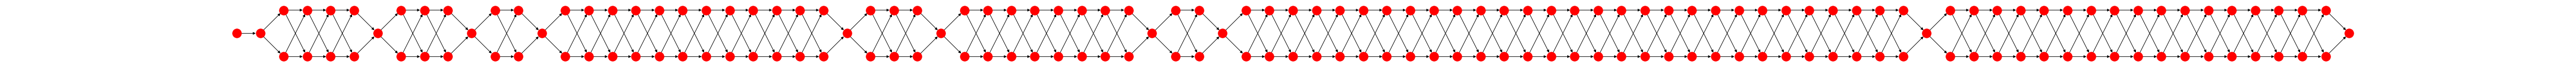

In [19]:
a.draw(a.solution_graph)

In [12]:
a.optimize_lagrangian(lambda_p=0, lambda_m=5)

...fixing edge order
...creating variable
(1, 21836)
...assembling constraints
(1L, 85L)
(21836L, 85L)
...assembling cost
... solving ...
... done!
... building solution graph ...
... done!


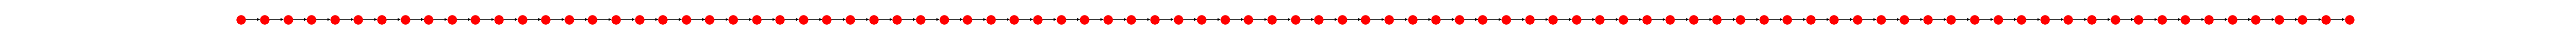

In [13]:
a.draw(a.solution_path)

In [20]:
path = nx.shortest_path(a.solution_graph, source=a.start, target=a.end, weight='weight')

In [24]:
correct, assigned = a.n_correct(path, e.true_x, threshold=2.5)

# assignable = 80
# assigned = 80
# correct = 72
PRC/RCL = 0.9/0.9


In [ ]:
zip(correct, assigned)

In [17]:
correct, assigned = a.n_correct(a.path, e.true_x, threshold=2.5)

# assignable = 84
# assigned = 81
# correct = 72
PRC/RCL = 0.888888888889/0.857142857143


In [16]:
a.accuracy(path, e.true_x)

NameError: name 'path' is not defined

In [ ]:
np.load('bmrb_results.npy')

In [ ]:
spin_ids = [v.spin_id for v in a.path[1:-1]]
equal = np.array(spin_ids) == e.residue_to_spin
print sum(equal)

In [ ]:
for ts, s in zip(e.residue_to_spin, spin_ids):
    if ts is None:
        continue
    if ts == s:
        continue
    print ts, s

In [ ]:
print e.spin_systems[40, :], e.spin_systems[32, :]
print e.spin_systems[54, :]
print e.spin_systems[37, :], e.spin_systems[77, :]

In [ ]:
e.true_matches

In [ ]:
l = np.array([0.2, 0.5])
u = np.array([0.8, 0.7])
test = np.random.random((50, 2))

In [ ]:
mask = np.logical_and(np.all(test > l.reshape((1, -1)), axis=1),
                      np.all(test < u.reshape((1, -1)), axis=1))

In [ ]:
test[mask, :]